In [11]:
import sympy as sp
from scipy import *
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np
import pandas as pd

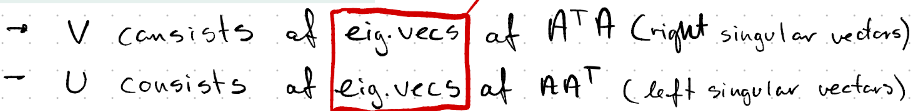

In [12]:
# right singular vectors
A = Matrix([[2,0,0],
            [0,2,1],
            [0,1,2],
            [0,0,0]])
AtA = A.T*A
vecs1 = AtA.eigenvects() # eigenvalues/vectors from AtA
A

⎡2  0  0⎤
⎢       ⎥
⎢0  2  1⎥
⎢       ⎥
⎢0  1  2⎥
⎢       ⎥
⎣0  0  0⎦

In [13]:
vecs1

⎡⎛      ⎡⎡0 ⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢-1⎥⎥⎟, ⎜4, 1, ⎢⎢0⎥⎥⎟, ⎜9, 1, ⎢⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [14]:
# We get singular values
s1 = sqrt(vecs1[2][0])
s2 = sqrt(vecs1[1][0])
s3 = sqrt(vecs1[0][0])

s1,s2,s3

In [15]:
# We get the eigenvectors from AtA
v1 = vecs1[2][2][0].normalized()
v2 = vecs1[1][2][0].normalized()
v3 = vecs1[0][2][0].normalized()

v1,v2,v3

⎛⎡0 ⎤       ⎡ 0  ⎤⎞
⎜⎢  ⎥       ⎢    ⎥⎟
⎜⎢√2⎥  ⎡1⎤  ⎢-√2 ⎥⎟
⎜⎢──⎥  ⎢ ⎥  ⎢────⎥⎟
⎜⎢2 ⎥, ⎢0⎥, ⎢ 2  ⎥⎟
⎜⎢  ⎥  ⎢ ⎥  ⎢    ⎥⎟
⎜⎢√2⎥  ⎣0⎦  ⎢ √2 ⎥⎟
⎜⎢──⎥       ⎢ ── ⎥⎟
⎝⎣2 ⎦       ⎣ 2  ⎦⎠

In [16]:
# We derive U vectors from v1..v3
u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2
u3 = (s3**-1)*A*v3
U1 = u1.row_join(u2).row_join(u3)
# We need one more vector in order to have 4 eigenvectors

Ut = u1.T.col_join(u2.T).col_join(u3.T)
u4 = Ut.nullspace()[0].normalized()
U = U1.row_join(u4)
display(U)

⎡0   1   0    0⎤
⎢              ⎥
⎢√2     -√2    ⎥
⎢──  0  ────  0⎥
⎢2       2     ⎥
⎢              ⎥
⎢√2      √2    ⎥
⎢──  0   ──   0⎥
⎢2       2     ⎥
⎢              ⎥
⎣0   0   0    1⎦

In [17]:
# We set up Vt
V = v1.row_join(v2).row_join(v3)
Vt = V.T
Vt

⎡    √2   √2⎤
⎢0   ──   ──⎥
⎢    2    2 ⎥
⎢           ⎥
⎢1   0    0 ⎥
⎢           ⎥
⎢   -√2   √2⎥
⎢0  ────  ──⎥
⎣    2    2 ⎦

In [18]:
# Create S with same shape as A (4 x 3)
S = diag(s1, s2, s3).col_join(zeros(1,3))
S

⎡3  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  0  0⎦

In [19]:
display(Math('U \Sigma V^T = {}{}{}'.format(latex(U), latex(S), latex(Vt))))

display(A == U*S*Vt)

<IPython.core.display.Math object>

True

--------------------------------------------------------------------------------------------

In [20]:
# Now let's try from AAt
#left singular vector
AAt = A*A.T
vecs2 = AAt.eigenvects() # eigenvalues/vectors from AAt
vecs2

⎡⎛      ⎡⎡0⎤⎤⎞  ⎛      ⎡⎡0 ⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡0⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜      ⎢⎢-1⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢ ⎥⎥⎟, ⎜1, 1, ⎢⎢  ⎥⎥⎟, ⎜4, 1, ⎢⎢ ⎥⎥⎟, ⎜9, 1, ⎢⎢ ⎥⎥⎟⎥
⎢⎜      ⎢⎢0⎥⎥⎟  ⎜      ⎢⎢1 ⎥⎥⎟  ⎜      ⎢⎢0⎥⎥⎟  ⎜      ⎢⎢1⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣0 ⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠  ⎝      ⎣⎣0⎦⎦⎠⎦

In [21]:
# We get singular values !! NOT TAKING 0
s1 = sqrt(vecs2[3][0])
s2 = sqrt(vecs2[2][0])
s3 = sqrt(vecs2[1][0])

In [22]:
# We obtain all eigenvalues from AAT and construct U
u1 = vecs2[3][2][0].normalized()
u2 = vecs2[2][2][0].normalized()
u3 = vecs2[1][2][0].normalized()
u4 = vecs2[0][2][0].normalized()
U = u1.row_join(u2).row_join(u3).row_join(u4)
U

⎡0   1   0    0⎤
⎢              ⎥
⎢√2     -√2    ⎥
⎢──  0  ────  0⎥
⎢2       2     ⎥
⎢              ⎥
⎢√2      √2    ⎥
⎢──  0   ──   0⎥
⎢2       2     ⎥
⎢              ⎥
⎣0   0   0    1⎦

In [23]:
# We construct v from u1..u3. Note the v's are the rows in Vt, e.g. v1^T
v1 = (s1**-1) * u1.T * A
v2 = (s2**-1) * u2.T * A
v3 = (s3**-1) * u3.T * A

Vt = v1.col_join(v2).col_join(v3)

In [24]:
# Let is construct S
S = diag(s1, s2, s3).col_join(zeros(1,3))
S

⎡3  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  0  0⎦

In [26]:
display(Math('U \Sigma V^T = {}{}{}'.format(latex(U), latex(S), latex(Vt))))

display(A == U*S*Vt)

<IPython.core.display.Math object>

True